## Problem statement:
### According to air travel consumer reports, a large proportion of consumer complaints are about frequent flight delays. Out of all the complaints received from consumers about airline services, 32% were related to cancellations, delays, or other deviations from the airlines’ schedules.There are unavoidable delays that can be caused by air traffic, no passengers at the airport, weather conditions, mechanical issues, passengers coming from delayed connecting flights, security clearance, and aircraft preparation.

## Objective:
### The objective of this project is to identify the factors that contribute to avoidable flight delays, and also required to build a model to predict if the flight will be delayed.

### Importing necessary Libraries

In [68]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.simplefilter('ignore')

## -- Reading data from all the datasets

In [136]:
df1=pd.read_excel('Documents/Simplilearn Course/Datasets (1)/Capstone_3/Airlines.xlsx')
df1.head(2)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1


In [137]:
df2=pd.read_excel('Documents/Simplilearn Course/Datasets (1)/Capstone_3/airports.xlsx')
df2.head(2)

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN


In [138]:
df3=pd.read_excel('Documents/Simplilearn Course/Datasets (1)/Capstone_3/runways.xlsx')
df3.head(2)

,id,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed,le_ident,le_latitude_deg,le_longitude_deg,le_elevation_ft,le_heading_degT,le_displaced_threshold_ft,he_ident,he_latitude_deg,he_longitude_deg,he_elevation_ft,he_heading_degT,he_displaced_threshold_ft
0,269408,6523,00A,80.0,80.0,ASPH-G,1,0,H1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,255155,6524,00AK,2500.0,70.0,GRVL,0,0,N,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN


In [139]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(518556, 9)
(73805, 18)
(43977, 20)


#### **checking for null values in all 3 dataframes

In [140]:
df3.isnull().sum()

id                               0
airport_ref                      0
airport_ident                    0
length_ft                      224
width_ft                      2889
surface                        457
lighted                          0
closed                           0
le_ident                       184
le_latitude_deg              28961
le_longitude_deg             28977
le_elevation_ft              31196
le_heading_degT              29353
le_displaced_threshold_ft    41094
he_ident                      6645
he_latitude_deg              29006
he_longitude_deg             29004
he_elevation_ft              31357
he_heading_degT              27549
he_displaced_threshold_ft    40801
dtype: int64

In [141]:
df2.isnull().sum()

id                       0
ident                    0
type                     0
name                     0
latitude_deg             0
longitude_deg            0
elevation_ft         14122
continent            35719
iso_country            259
iso_region               0
municipality          5066
scheduled_service        0
gps_code             30809
iata_code            64645
local_code           40830
home_link            70313
wikipedia_link       63100
keywords             59854
dtype: int64

In [142]:
df1.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

#### ** Renaming column airport_ident into ident to have the columns with the same name in df2 and df3 dataframes 

In [143]:
df3.rename(columns={'airport_ident':'ident'},inplace=True)
df3.columns

Index(['id', 'airport_ref', 'ident', 'length_ft', 'width_ft', 'surface',
       'lighted', 'closed', 'le_ident', 'le_latitude_deg', 'le_longitude_deg',
       'le_elevation_ft', 'le_heading_degT', 'le_displaced_threshold_ft',
       'he_ident', 'he_latitude_deg', 'he_longitude_deg', 'he_elevation_ft',
       'he_heading_degT', 'he_displaced_threshold_ft'],
      dtype='object')

#### ** below command is used for displaying all the columns(if it has more columns)

In [144]:
pd.set_option('display.max_columns',None)

## --Gathering all fields in one dataframe
#### **for df1 and df2 using concatenating to combine dataframes
#### **ofter that using merge for concat_df and df3 dataframes, ident column is key to combine the dataframes

In [145]:
concat_df=pd.concat([df1,df2],axis=1)
merged_df=pd.merge(concat_df,df3,how='outer',on='ident')
merged_df.head()

,id_x,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,id_x,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,id_y,airport_ref,length_ft,width_ft,surface,lighted,closed,le_ident,le_latitude_deg,le_longitude_deg,le_elevation_ft,le_heading_degT,le_displaced_threshold_ft,he_ident,he_latitude_deg,he_longitude_deg,he_elevation_ft,he_heading_degT,he_displaced_threshold_ft
0,1,CO,269,SFO,IAH,3,15,205,1,6523.0,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN,269408.0,6523.0,80.0,80.0,ASPH-G,1.0,0.0,H1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,US,1558,PHX,CLT,3,15,222,1,323361.0,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,AA,2400,LAX,DFW,3,20,165,1,6524.0,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN,255155.0,6524.0,2500.0,70.0,GRVL,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN
3,4,AA,2466,SFO,DFW,3,20,195,1,6525.0,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN,254165.0,6525.0,2300.0,200.0,TURF,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN
4,5,AS,108,ANC,SEA,3,30,202,0,6526.0,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR,270932.0,6526.0,40.0,40.0,GRASS,0.0,0.0,H1,NaN,NaN,NaN,NaN,NaN,H1,NaN,NaN,NaN,NaN,NaN


In [146]:
merged_df.shape

(525268, 46)

In [147]:
merged_df.isnull().sum().sum()

17887502

In [148]:
merged_df.columns

Index(['id_x', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay', 'id_x', 'ident', 'type', 'name',
       'latitude_deg', 'longitude_deg', 'elevation_ft', 'continent',
       'iso_country', 'iso_region', 'municipality', 'scheduled_service',
       'gps_code', 'iata_code', 'local_code', 'home_link', 'wikipedia_link',
       'keywords', 'id_y', 'airport_ref', 'length_ft', 'width_ft', 'surface',
       'lighted', 'closed', 'le_ident', 'le_latitude_deg', 'le_longitude_deg',
       'le_elevation_ft', 'le_heading_degT', 'le_displaced_threshold_ft',
       'he_ident', 'he_latitude_deg', 'he_longitude_deg', 'he_elevation_ft',
       'he_heading_degT', 'he_displaced_threshold_ft'],
      dtype='object')

#### ** Deleting unwanted columns from the merged dataframe

In [149]:
merged_df.drop(columns=['id_x','name','latitude_deg','longitude_deg','continent','iso_country', 'iso_region', 'municipality', 
        'scheduled_service','gps_code','local_code', 'home_link', 'wikipedia_link','keywords', 'id_y','lighted',
        'closed','le_ident', 'le_latitude_deg', 'le_longitude_deg',
       'le_elevation_ft', 'le_heading_degT', 'le_displaced_threshold_ft',
       'he_ident', 'he_latitude_deg', 'he_longitude_deg', 'he_elevation_ft',
       'he_heading_degT', 'he_displaced_threshold_ft'],inplace=True)

In [150]:
merged_df.head(2)

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,ident,type,elevation_ft,iata_code,airport_ref,length_ft,width_ft,surface
0,CO,269,SFO,IAH,3,15,205,1,00A,heliport,11.0,NaN,6523.0,80.0,80.0,ASPH-G
1,US,1558,PHX,CLT,3,15,222,1,00AA,small_airport,3435.0,NaN,NaN,NaN,NaN,NaN


In [151]:
merged_df.shape

(525268, 16)

In [152]:
merged_df.dtypes

Airline          object
Flight            int64
AirportFrom      object
AirportTo        object
DayOfWeek         int64
Time              int64
Length            int64
Delay             int64
ident            object
type             object
elevation_ft    float64
iata_code        object
airport_ref     float64
length_ft       float64
width_ft        float64
surface          object
dtype: object

In [153]:
merged_df.isnull().sum()

Airline              0
Flight               0
AirportFrom          0
AirportTo            0
DayOfWeek            0
Time                 0
Length               0
Delay                0
ident           444751
type            444751
elevation_ft    459138
iata_code       513068
airport_ref     481291
length_ft       481515
width_ft        484180
surface         481748
dtype: int64

## --When it comes to on-time arrivals, different airlines perform differently based on the amount of experience they have. The major airlines in this field include US Airways Express (founded in 1967). Pull such information specific to various airlines from the Wikipedia page link given below.
https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States.

In [154]:
test_df=pd.read_html('https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States')

In [155]:
len(test_df)

21

#### ** Extracting List of airlines of the United States from above test_df

In [156]:
us_air_lines=test_df[0]
us_air_lines.head()

,Airline,Image,IATA,ICAO,Callsign,"Primary hubs, secondary hubs",Founded,Notes
0,Alaska Airlines,NaN,AS,ASA,ALASKA,Seattle/TacomaAnchoragePortland (OR)San Franci...,1932,Founded as McGee Airways and commenced operati...
1,Allegiant Air,NaN,G4,AAY,ALLEGIANT,Las VegasCincinnatiDestin/Ft. Walton BeachIndi...,1997,Founded as WestJet Express and began operation...
2,American Airlines,NaN,AA,AAL,AMERICAN,Dallas/Fort WorthCharlotteChicago–O'HareMiamiP...,1926,Founded as American Airways and commenced oper...
3,Avelo Airlines,NaN,XP,VXP,AVELO,BurbankNew HavenOrlandoRaleigh/DurhamWilmingto...,1987,First did business as Casino Express Airlines ...
4,Breeze Airways,NaN,MX,MXY,MOXY,Charleston (SC)HartfordNew OrleansNorfolkProvi...,2018,Founded as Moxy Airways but was renamed due to...


In [157]:
us_air_lines.shape

(14, 8)

In [158]:
us_air_lines.isnull().sum()

Airline                          0
Image                           14
IATA                             0
ICAO                             0
Callsign                         0
Primary hubs, secondary hubs     0
Founded                          0
Notes                            2
dtype: int64

## --The total passenger traffic may also contribute to flight delays. The term hub refers to busy commercial airports. Large hubs are airports that account for at least 1 percentof the total passenger enplanements in the United States. Airports that account for 0.25 percent to 1 percent of total passenger enplanements are considered medium hubs. Pull passenger traffic data from the Wikipedia page given below .
https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States

In [159]:
test_df1=pd.read_html('https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States')

In [160]:
len(test_df1)

10

#### **Extracting Large hubs airports data from the given wikipedia

In [161]:
large_hub_df1=test_df1[1]
large_hub_df1.head(2)

,Rank(2023),Airports (large),IATACode,Major cities served,Metro area,State,2023[2],2022[3],2021[4],2020[5],2019[6],2018[7],2017[8],2016[9],2015[10],2014[11]
0,1,Hartsfield–Jackson Atlanta International Airport,ATL,Atlanta,Atlanta,GA,50950023,45396001,36676010,20559866,53505795,51865797,50251964,50501858,49340732,46604273
1,2,Dallas/Fort Worth International Airport,DFW,Dallas and Fort Worth,Dallas–Fort Worth,TX,39246196,35345138,30005266,18593421,35778573,32821799,31816933,31283579,31589839,30804567


In [162]:
large_hub_df1.columns

Index(['Rank(2023)', 'Airports (large)', 'IATACode', 'Major cities served',
       'Metro area', 'State', '2023[2]', '2022[3]', '2021[4]', '2020[5]',
       '2019[6]', '2018[7]', '2017[8]', '2016[9]', '2015[10]', '2014[11]'],
      dtype='object')

In [163]:
len(large_hub_df1)

31

In [164]:
large_hub_df1.drop(columns=['2023[2]','2022[3]', '2021[4]', '2020[5]', '2019[6]','2018[7]', '2017[8]', '2016[9]', '2015[10]','2014[11]', 
                            'Rank(2023)','Major cities served','Metro area','State'],inplace=True)

In [165]:
large_hub_df1.isnull().sum()

Airports (large)    0
IATACode            0
dtype: int64

#### **Extracting Medium hubs airports data from the given wikipedia

In [166]:
medium_hub_df1=test_df1[2]
medium_hub_df1.head(2)

,Rank(2023),Airports (medium hubs),IATACode,City served,Metro Area,State,2023[2],2022[3],2021[4],2020[5],2019[6],2018[7],2017[8],2016[9],2015[10],2014[11]
0,32,Dallas Love Field,DAL,Dallas,Dallas–Fort Worth,TX,8559009,7819129,6487563,3669930,8408457,8134848,7876769,7554596,7040921,4522341
1,33,Portland International Airport,PDX,Portland,Portland,OR,8123024,7241882,5759879,3455877,9797408,9940866,9435473,9071154,8340234,7878760


In [167]:
len(medium_hub_df1)

33

In [168]:
medium_hub_df1.drop(columns=['2023[2]','2022[3]', '2021[4]', '2020[5]', '2019[6]','2018[7]', '2017[8]', '2016[9]', '2015[10]','2014[11]', 
                            'Rank(2023)','City served','Metro Area','State'],inplace=True)

In [169]:
medium_hub_df1.isnull().sum()

Airports (medium hubs)    0
IATACode                  0
dtype: int64

#### ** And then combining both large hub airports data and medium hub airports data into one Dataframe using merge

In [170]:
large_medium_hubs=pd.merge(large_hub_df1,medium_hub_df1,on='IATACode',how='outer')
large_medium_hubs.head()

,Airports (large),IATACode,Airports (medium hubs)
0,Hartsfield–Jackson Atlanta International Airport,ATL,NaN
1,Dallas/Fort Worth International Airport,DFW,NaN
2,Denver International Airport,DEN,NaN
3,Los Angeles International Airport,LAX,NaN
4,O'Hare International Airport,ORD,NaN


In [171]:
large_medium_hubs.isnull().sum()

Airports (large)          33
IATACode                   0
Airports (medium hubs)    31
dtype: int64

In [172]:
large_medium_hubs.shape

(64, 3)

#### ** In large_medium_hubs dataframe,  Renaming column IATACode into iata_code to match the column name in merged_df dataframe

In [173]:
large_medium_hubs.rename(columns={'IATACode':'iata_code'},inplace=True)
large_medium_hubs.columns

Index(['Airports (large)', 'iata_code', 'Airports (medium hubs)'], dtype='object')

#### **Combining merged_df and large_medium_hubs dataframes into one so that all the information is in one place, key should be iata_code

In [174]:
merged_Df1=pd.merge(merged_df,large_medium_hubs,on='iata_code',how='outer')
merged_Df1.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,ident,type,elevation_ft,iata_code,airport_ref,length_ft,width_ft,surface,Airports (large),Airports (medium hubs)
0,CO,269,SFO,IAH,3,15,205,1,00A,heliport,11.0,NaN,6523.0,80.0,80.0,ASPH-G,NaN,NaN
1,US,1558,PHX,CLT,3,15,222,1,00AA,small_airport,3435.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AA,2400,LAX,DFW,3,20,165,1,00AK,small_airport,450.0,NaN,6524.0,2500.0,70.0,GRVL,NaN,NaN
3,AA,2466,SFO,DFW,3,20,195,1,00AL,small_airport,820.0,NaN,6525.0,2300.0,200.0,TURF,NaN,NaN
4,AS,108,ANC,SEA,3,30,202,0,00AR,closed,237.0,NaN,6526.0,40.0,40.0,GRASS,NaN,NaN


In [175]:
merged_Df1.shape

(525268, 18)

In [176]:
merged_Df1.isnull().sum()

Airline                        0
Flight                         0
AirportFrom                    0
AirportTo                      0
DayOfWeek                      0
Time                           0
Length                         0
Delay                          0
ident                     444751
type                      444751
elevation_ft              459138
iata_code                 513068
airport_ref               481291
length_ft                 481515
width_ft                  484180
surface                   481748
Airports (large)          525134
Airports (medium hubs)    525170
dtype: int64

#### **There are null values in some columns so replacing them with median,mode and with 'none' for some other columns

In [177]:
merged_Df1['type']=merged_Df1['type'].fillna(merged_Df1['type'].mode()[0])

merged_Df1['elevation_ft']=merged_Df1['elevation_ft'].fillna(merged_Df1['elevation_ft'].median())

merged_Df1['airport_ref']=merged_Df1['airport_ref'].fillna(merged_Df1['airport_ref'].median())

merged_Df1['length_ft']=merged_Df1['length_ft'].fillna(merged_Df1['length_ft'].median())

merged_Df1['width_ft']=merged_Df1['width_ft'].fillna(merged_Df1['width_ft'].median())

merged_Df1['Airports (large)']=merged_Df1['Airports (large)'].fillna('none')

merged_Df1['Airports (medium hubs)']=merged_Df1['Airports (medium hubs)'].fillna('none')


## --Perform data visualization and share your insights on the following points:

In [178]:
merged_Df1.head(1)

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,ident,type,elevation_ft,iata_code,airport_ref,length_ft,width_ft,surface,Airports (large),Airports (medium hubs)
0,CO,269,SFO,IAH,3,15,205,1,00A,heliport,11.0,NaN,6523.0,80.0,80.0,ASPH-G,none,none


### a. According to the data provided, approximately 70% of Southwest Airlines flights are delayed. Visualize it to compare it with the data of other airlines.

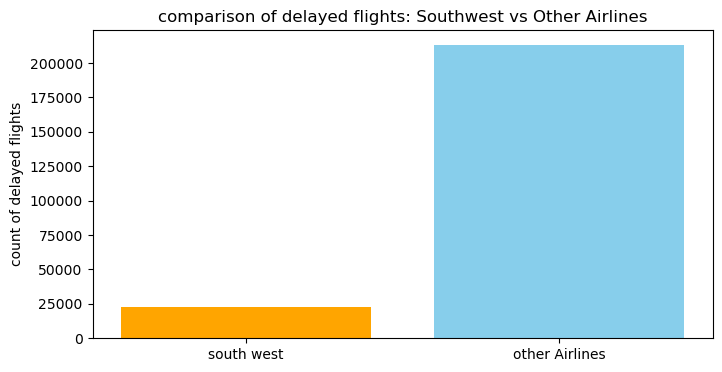

In [179]:
southwest_data=merged_Df1[merged_Df1['Airline']=='OO']    # 'OO'-southwest
other_airlines_data=merged_Df1[merged_df['Airline']!='OO']
plt.figure(figsize=(8,4))
plt.bar('south west',southwest_data['Delay'].sum(),color='orange') # count of delayed flights for southwest
plt.bar('other Airlines',other_airlines_data['Delay'].sum(),color='skyblue') # count of delayed flights for other airlines
plt.title('comparison of delayed flights: Southwest vs Other Airlines')
plt.ylabel('count of delayed flights')
plt.show()

** approximately 25000 Southwest Airlines flights were delayed and above 200000 airlines were delayed for other airlines **

### b. Flights were delayed on various weekdays. Which day of the week is the safest for travel?

In [180]:
merged_Df1['DayOfWeek'].value_counts()

4    89504
3    87587
5    84777
1    70008
2    68721
7    68012
6    56659
Name: DayOfWeek, dtype: int64

In [181]:
week_delays=merged_Df1.groupby('DayOfWeek')['Delay'].sum()
week_delays

DayOfWeek
1    33059
2    31072
3    41620
4    40712
5    35519
6    22963
7    31054
Name: Delay, dtype: int64

In [182]:
safest_weekday=week_delays.idxmin()
print(f'safest weekday for travelling is {safest_weekday}:')

safest weekday for travelling is 6:


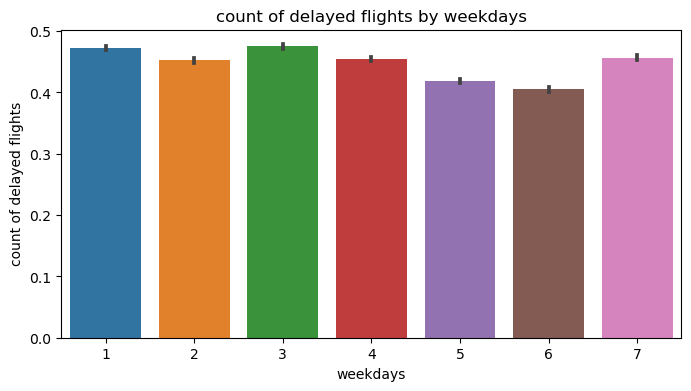

In [183]:
plt.figure(figsize=(8,4))
sns.barplot(x='DayOfWeek',y='Delay',data=merged_Df1)
plt.title('count of delayed flights by weekdays')
plt.xlabel('weekdays')
plt.ylabel('count of delayed flights')
plt.show()

** the safest weekday for travelling is 6th weekday with the count of delays 22963 **

### c. Which airlines should be recommended for short-, medium-, and long-distance travel?

In [184]:
merged_Df1.describe().Length

count    525268.000000
mean        132.207692
std          70.924749
min           0.000000
25%          80.000000
50%         115.000000
75%         163.000000
max         655.000000
Name: Length, dtype: float64

#### ** column 'Length' has continuous  numeric data so for converting into categorical data binning is used

In [185]:
bin_edges=[0.000000,80.000000,163.000000,655.000000]
bin_names=['short-distance','medium-distance','long-distance']
merged_Df1['travelling_duration']=pd.cut(merged_Df1['Length'],bin_edges,labels=bin_names)
merged_Df1.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,ident,type,elevation_ft,iata_code,airport_ref,length_ft,width_ft,surface,Airports (large),Airports (medium hubs),travelling_duration
0,CO,269,SFO,IAH,3,15,205,1,00A,heliport,11.0,NaN,6523.0,80.0,80.0,ASPH-G,none,none,long-distance
1,US,1558,PHX,CLT,3,15,222,1,00AA,small_airport,3435.0,NaN,19486.0,2700.0,75.0,NaN,none,none,long-distance
2,AA,2400,LAX,DFW,3,20,165,1,00AK,small_airport,450.0,NaN,6524.0,2500.0,70.0,GRVL,none,none,long-distance
3,AA,2466,SFO,DFW,3,20,195,1,00AL,small_airport,820.0,NaN,6525.0,2300.0,200.0,TURF,none,none,long-distance
4,AS,108,ANC,SEA,3,30,202,0,00AR,closed,237.0,NaN,6526.0,40.0,40.0,GRASS,none,none,long-distance


### d. Do you notice any patterns in the departure times of long-duration flights?

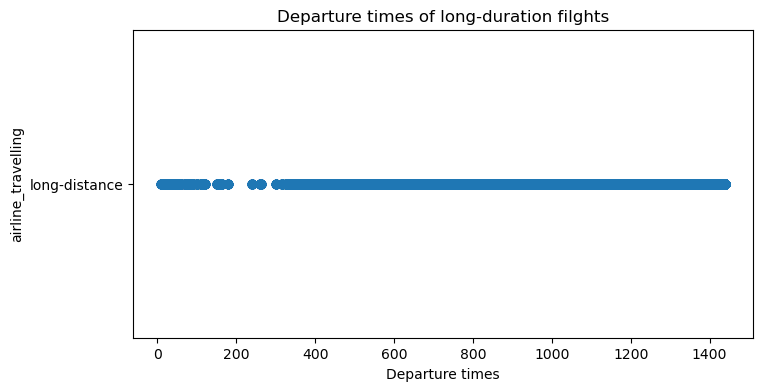

In [186]:
long_duration_flights=merged_Df1[merged_Df1['travelling_duration']=='long-distance']
plt.figure(figsize=(8,4))
plt.scatter(long_duration_flights['Time'],long_duration_flights['travelling_duration'])
plt.title('Departure times of long-duration filghts')
plt.xlabel('Departure times')
plt.ylabel('airline_travelling')
plt.show()

** the Large hubs and Medium hubs columns are melted into a single column, and then Delay column is used for hue **

** There is no difference between  Large and Medium hubs in delayed flights **

## --Find the correlation matrix between the flight delay predictors, create a heatmap to visualize this, and share your findings

In [187]:
merged_Df1.corr()

,Flight,DayOfWeek,Time,Length,Delay,elevation_ft,airport_ref,length_ft,width_ft
Flight,1.000000,0.001435,-0.001842,-0.350262,-0.057803,-0.001719,-0.000765,0.001721,0.001163
DayOfWeek,0.001435,1.000000,-0.001936,0.012987,-0.027152,0.059487,0.049505,0.066406,0.013380
Time,-0.001842,-0.001936,1.000000,-0.020418,0.150678,-0.028650,-0.001762,-0.021194,-0.014841
Length,-0.350262,0.012987,-0.020418,1.000000,0.040592,0.001805,-0.000223,0.002130,-0.001519
Delay,-0.057803,-0.027152,0.150678,0.040592,1.000000,-0.030692,-0.016027,-0.029028,-0.009960
elevation_ft,-0.001719,0.059487,-0.028650,0.001805,-0.030692,1.000000,0.074755,0.065895,-0.003731
airport_ref,-0.000765,0.049505,-0.001762,-0.000223,-0.016027,0.074755,1.000000,-0.059373,0.000108
length_ft,0.001721,0.066406,-0.021194,0.002130,-0.029028,0.065895,-0.059373,1.000000,0.263711
width_ft,0.001163,0.013380,-0.014841,-0.001519,-0.009960,-0.003731,0.000108,0.263711,1.000000


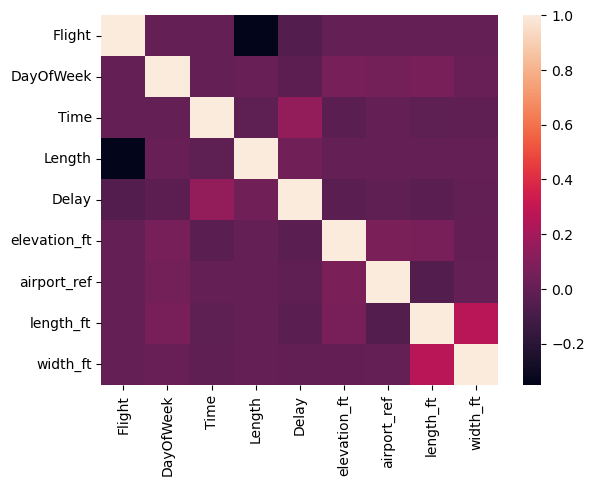

In [188]:
sns.heatmap(merged_Df1.corr());

** there is no highly positive correlation among variables **

In [189]:
merged_Df1.isnull().sum()

Airline                        0
Flight                         0
AirportFrom                    0
AirportTo                      0
DayOfWeek                      0
Time                           0
Length                         0
Delay                          0
ident                     444751
type                           0
elevation_ft                   0
iata_code                 513068
airport_ref                    0
length_ft                      0
width_ft                       0
surface                   481748
Airports (large)               0
Airports (medium hubs)         0
travelling_duration            4
dtype: int64

In [190]:
merged_Df1['travelling_duration']=merged_Df1['travelling_duration'].fillna(merged_Df1['travelling_duration'].mode()[0])

In [191]:
merged_Df1.columns

Index(['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time',
       'Length', 'Delay', 'ident', 'type', 'elevation_ft', 'iata_code',
       'airport_ref', 'length_ft', 'width_ft', 'surface', 'Airports (large)',
       'Airports (medium hubs)', 'travelling_duration'],
      dtype='object')

In [192]:
merged_Df1.drop(columns=['ident','iata_code','surface'],inplace=True)

In [193]:
merged_Df1.isnull().sum()

Airline                   0
Flight                    0
AirportFrom               0
AirportTo                 0
DayOfWeek                 0
Time                      0
Length                    0
Delay                     0
type                      0
elevation_ft              0
airport_ref               0
length_ft                 0
width_ft                  0
Airports (large)          0
Airports (medium hubs)    0
travelling_duration       0
dtype: int64

In [194]:
#merged_Df2=merged_Df1.copy()

In [195]:
#merged_Df2.to_csv('Downloads/Datasets (1)/Capstone_3/Airlines_Airports_runways.csv')

#### **Dropping unwanted columns

In [196]:
merged_Df1.drop(columns=['AirportFrom', 'AirportTo','Airports (large)','Airports (medium hubs)'],
                inplace=True)

## --Use OneHotEncoder and OrdinalEncoder to deal with categorical variables

#### **Using Encoding to convert categorical data to numeric(binary) data

In [197]:
merged_Df1=pd.get_dummies(merged_Df1,columns=['Airline','type','travelling_duration'])

In [198]:
merged_Df1.head()

,Flight,DayOfWeek,Time,Length,Delay,elevation_ft,airport_ref,length_ft,width_ft,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,Airline_HA,Airline_MQ,Airline_OH,Airline_OO,Airline_UA,Airline_US,Airline_WN,Airline_XE,Airline_YV,type_balloonport,type_closed,type_heliport,type_large_airport,type_medium_airport,type_seaplane_base,type_small_airport,travelling_duration_short-distance,travelling_duration_medium-distance,travelling_duration_long-distance
0,269,3,15,205,1,11.0,6523.0,80.0,80.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1558,3,15,222,1,3435.0,19486.0,2700.0,75.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
2,2400,3,20,165,1,450.0,6524.0,2500.0,70.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,2466,3,20,195,1,820.0,6525.0,2300.0,200.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,108,3,30,202,0,237.0,6526.0,40.0,40.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


### *Importing Machine Learning libraries

In [199]:
from sklearn.model_selection import train_test_split,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,make_scorer

In [200]:
merged_Df1.head()

,Flight,DayOfWeek,Time,Length,Delay,elevation_ft,airport_ref,length_ft,width_ft,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,Airline_HA,Airline_MQ,Airline_OH,Airline_OO,Airline_UA,Airline_US,Airline_WN,Airline_XE,Airline_YV,type_balloonport,type_closed,type_heliport,type_large_airport,type_medium_airport,type_seaplane_base,type_small_airport,travelling_duration_short-distance,travelling_duration_medium-distance,travelling_duration_long-distance
0,269,3,15,205,1,11.0,6523.0,80.0,80.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1558,3,15,222,1,3435.0,19486.0,2700.0,75.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
2,2400,3,20,165,1,450.0,6524.0,2500.0,70.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,2466,3,20,195,1,820.0,6525.0,2300.0,200.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,108,3,30,202,0,237.0,6526.0,40.0,40.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


#### **Performing Standardization on some coloumns to bring values in same range

In [201]:
cols_to_scale=['Flight','Time','Length','elevation_ft','airport_ref','length_ft','width_ft']

In [202]:
scaler=StandardScaler()

In [203]:
merged_Df1[cols_to_scale]=scaler.fit_transform(merged_Df1[cols_to_scale])

In [204]:
merged_Df1.head()

,Flight,DayOfWeek,Time,Length,Delay,elevation_ft,airport_ref,length_ft,width_ft,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,Airline_HA,Airline_MQ,Airline_OH,Airline_OO,Airline_UA,Airline_US,Airline_WN,Airline_XE,Airline_YV,type_balloonport,type_closed,type_heliport,type_large_airport,type_medium_airport,type_seaplane_base,type_small_airport,travelling_duration_short-distance,travelling_duration_medium-distance,travelling_duration_long-distance
0,-1.074536,3,-2.823451,1.026333,1,-1.268408,-0.552417,-3.358642,0.036184,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,-0.453383,3,-2.823451,1.266023,1,4.287461,-0.084808,-0.057593,-0.041617,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
2,-0.047633,3,-2.805463,0.462354,1,-0.556075,-0.552381,-0.309582,-0.119418,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,-0.015829,3,-2.805463,0.885338,1,0.044296,-0.552345,-0.561570,1.903412,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,-1.152120,3,-2.769487,0.984034,0,-0.901695,-0.552309,-3.409040,-0.586225,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


#### **splitting data into the x and y variables

In [205]:
x=merged_Df1.drop(['Delay'],axis=1)
y=merged_Df1.Delay

In [206]:
# split data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

## --Apply stochastic gradient descent optimizer and decision tree models

In [207]:
# define models
sgd=SGDClassifier(random_state=42)  # SGDClassifier 
decision=DecisionTreeClassifier(random_state=42)

## --Use the stratified five-fold method to build and validate the models

In [208]:
# define cross-validation
stratified_kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [209]:
# define scorer
accuracy_scorer=make_scorer(accuracy_score)

## --Use RandomizedSearchCV for hyperparameter tuning

In [210]:
# define hyperparameter search space
sgd_param={
    'alpha':[0.0001,0.001,0.01,0.1,1.0],
    'l1_ratio':[0,0.1,0.5,0.7,0.9,1]
}
tree_param={
    'max_depth':[None,5,10,15,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
}

In [211]:
# hyperparameter tuning with RandomizedSearchCV
sgd_random_search=RandomizedSearchCV(sgd,sgd_param,scoring=accuracy_scorer,cv=stratified_kfold,n_iter=10,random_state=42)
Decision_tree_random_search=RandomizedSearchCV(decision,tree_param,scoring=accuracy_scorer,cv=stratified_kfold,n_iter=10,
                            random_state=42)

In [212]:
# fit models
sgd_random_search.fit(x_train,y_train)
Decision_tree_random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring=make_scorer(accuracy_score))

In [214]:
# evaluate models
sgd_accuracy=sgd_random_search.score(x_test,y_test)
tree_accuracy=Decision_tree_random_search.score(x_test,y_test)

In [216]:
print(f'SGD Classifier Accuracy:{sgd_accuracy}')
print(f'Decision Tree Classifier Accuracy:{tree_accuracy}')

SGD Classifier Accuracy:0.6295238639176043
Decision Tree Classifier Accuracy:0.6479715194090658


**Decision tree classifier predicts more accurately compare to stochastic gradient descent optimizer.** 